In [57]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #make matplotlib work like MATLAB
%matplotlib inline
import os  #module in Python provides functions for interacting with the operating system
from PIL import Image #module provides a class with the same name which is used to represent a image, Python Imaging Library (PIL)
import pathlib  #module offers classes representing filesystem paths
import  csv     
from sklearn.model_selection import train_test_split   #Split arrays or matrices into random train and test subsets
from sklearn.preprocessing import LabelEncoder, StandardScaler    #Encode target labels with value between 0 and n_classes-1.
import keras    #deep learning framework, AI Neural Networks
from keras import layers      #makes blocks of layers for neural networks
from keras.layers import Conv1D, MaxPooling1D, Flatten #convolution,max pooling operation for temporal data,  to get a copy of an given array collapsed into one dimension
import keras
from keras.models import Sequential #appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
import warnings
from collections import deque

warnings.filterwarnings('ignore')

In [58]:
data_set = '/content/drive/MyDrive/Colab Notebooks/My_DataSet'        #Dadat folder call


In [59]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'   #used for the feature extraction 
header += ' label'
header = header.split()

In [60]:
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [61]:
sr = 44100           #fs >= 2f, nyquist theorem
for dir in os.listdir(data_set):      #to extract whole directory like subfolders and their data
  subpath = os.path.join(data_set,dir)
  for audio_file in os.listdir(subpath):
    # print(os.path.join(subpath,audio_file))
    audio_file_path = os.path.join(subpath,audio_file)

    y, sr = librosa.load(audio_file_path, sr=sr)      #sampling
    rms = librosa.feature.rms(y=y)       #root mesan square rms
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)  #Compute a chromagram from a waveform or power spectrogram
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)   #computes the spectral centroid from the (squared) magnitude spectrum
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)    
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)   #rate at which a signal changes from positive to zero to negative or from negative to zero to positive
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f' {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
      to_append += f' {np.mean(e)}'     #f-string
    to_append += f' {dir}'
    # print(audio_file_path)
    
    file = open('dataset.csv', 'a', newline='')
    with file:
      writer = csv.writer(file)
      features = deque(to_append.split())
      features.appendleft(audio_file_path)
      features = list(features)
      writer.writerow(features)
    # break
    # x , sr = librosa.load(audio_file_path, sr=44100)
    # print(type(x), type(sr))#<class 'numpy.ndarray'> <class 'int'>
    # print(x.shape, sr)#(94316,) 22050
    # break



In [62]:
data = pd.read_csv('/content/dataset.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
print(genre_list)
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
print(y)
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


0       Baji
1       Baji
2       Baji
3       Baji
4       Baji
       ...  
145    Chief
146    Chief
147    Chief
148    Chief
149    Chief
Name: label, Length: 150, dtype: object
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [63]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=64)

Epoch 1/30
2/2 [==============================] - 0s 7ms/step - loss: 1.1201 - accuracy: 0.4193
Epoch 2/30
2/2 [==============================] - 0s 5ms/step - loss: 0.7511 - accuracy: 0.9590
Epoch 3/30
2/2 [==============================] - 0s 7ms/step - loss: 0.4963 - accuracy: 0.9821
Epoch 4/30
2/2 [==============================] - 0s 8ms/step - loss: 0.3212 - accuracy: 0.9821
Epoch 5/30
2/2 [==============================] - 0s 3ms/step - loss: 0.1933 - accuracy: 1.0000
Epoch 6/30
2/2 [==============================] - 0s 7ms/step - loss: 0.1218 - accuracy: 1.0000
Epoch 7/30
2/2 [==============================] - 0s 7ms/step - loss: 0.0624 - accuracy: 1.0000
Epoch 8/30
2/2 [==============================] - 0s 7ms/step - loss: 0.0369 - accuracy: 1.0000
Epoch 9/30
2/2 [==============================] - 0s 7ms/step - loss: 0.0230 - accuracy: 1.0000
Epoch 10/30
2/2 [==============================] - 0s 5ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 11/30
2/2 [======================

In [65]:
# # select a single sample
# i=0;
# correct =0
# incorrect = 0
# for Xsample in X_test:
  
#   # make a probabilistic prediction
#   yhat_prob = model.predict_proba(Xsample.reshape(1,-1))
#   # make a classification prediction
#   yhat_class = model.predict(Xsample.reshape(1,-1))
#   if yhat_class == y_test[i]:
#     correct +=1;
#   else:
#     incorrect+=1
#   i+=1
# print(correct)
# print(incorrect)

In [66]:
#get the accuracy of the trained model on the test dataset (unseen)

# test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
# print('Test accuracy:', test_acc)

#get the predictions for the test dataset
predictions = model.predict(X_test)

In [67]:
#function to pretty plot confusion matrix (modified from SKLEARN)

import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[14  0  0]
 [ 0 16  0]
 [ 0  0 15]]

Classification Report
              precision    recall  f1-score   support

       Noman       1.00      1.00      1.00        14
        Baji       1.00      1.00      1.00        16
       Chief       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



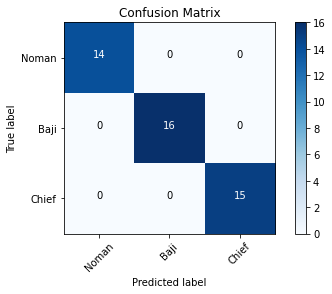

In [68]:
class_names = ['Noman','Baji','Chief']
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, predictions.argmax(axis=1))
plot_confusion_matrix(cm=matrix, classes=class_names, title='Confusion Matrix')

print('\nClassification Report')
print(classification_report(y_test, predictions.argmax(axis=1), target_names=class_names))

In [69]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_train.shape

(105, 26, 1)

In [70]:
V_CNN = Sequential()    #Vanilla CNN
V_CNN.add(Conv1D(filters=256, kernel_size=3, activation='relu',input_shape=(26,1) ))
V_CNN.add(MaxPooling1D(pool_size=2))
V_CNN.add(Conv1D(filters=128, kernel_size=3, activation='relu' ))
V_CNN.add(MaxPooling1D(pool_size=2))
V_CNN.add(Flatten())
V_CNN.add(layers.Dense(32, activation='relu'))
V_CNN.add(layers.Dense(3, activation='softmax'))
V_CNN.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
import tensorflow as tf
V_CNN.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [72]:
classifier = V_CNN.fit(X_train,
                    y_train,
                    epochs=30, batch_size=64)


Epoch 1/30
2/2 [==============================] - 0s 21ms/step - loss: 1.1065 - accuracy: 0.2963
Epoch 2/30
2/2 [==============================] - 0s 17ms/step - loss: 0.9875 - accuracy: 0.7926
Epoch 3/30
2/2 [==============================] - 0s 21ms/step - loss: 0.8760 - accuracy: 0.8348
Epoch 4/30
2/2 [==============================] - 0s 17ms/step - loss: 0.7628 - accuracy: 0.8527
Epoch 5/30
2/2 [==============================] - 0s 17ms/step - loss: 0.6604 - accuracy: 0.8874
Epoch 6/30
2/2 [==============================] - 0s 17ms/step - loss: 0.5396 - accuracy: 0.9526
Epoch 7/30
2/2 [==============================] - 0s 21ms/step - loss: 0.4453 - accuracy: 0.9474
Epoch 8/30
2/2 [==============================] - 0s 17ms/step - loss: 0.3667 - accuracy: 0.9653
Epoch 9/30
2/2 [==============================] - 0s 16ms/step - loss: 0.2741 - accuracy: 0.9705
Epoch 10/30
2/2 [==============================] - 0s 16ms/step - loss: 0.1999 - accuracy: 0.9757
Epoch 11/30
2/2 [============

In [73]:

#get the predictions for the test dataset
V_CNN_predictions = V_CNN.predict(X_test)

Confusion matrix, without normalization
[[14  0  0]
 [ 0 15  1]
 [ 0  0 15]]

Classification Report
              precision    recall  f1-score   support

       Noman       1.00      1.00      1.00        14
        Baji       1.00      0.94      0.97        16
       Chief       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



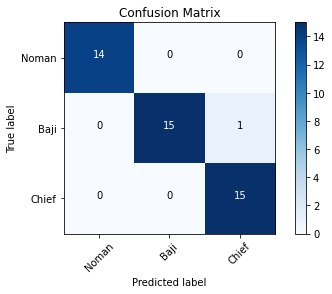

In [74]:
matrix = confusion_matrix(y_test, V_CNN_predictions.argmax(axis=1))
plot_confusion_matrix(cm=matrix, classes=class_names, title='Confusion Matrix')

print('\nClassification Report')
print(classification_report(y_test, V_CNN_predictions.argmax(axis=1), target_names=class_names))

In [75]:
Noman_test = '/content/drive/MyDrive/Colab Notebooks/Noman_test'

In [76]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [77]:
file = open('Noman_test.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [78]:
sr = 44100           #fs >= 2f, nyquist theorem
for filepath in os.listdir(Noman_test):
  # subpath = os.path.join(data_set,dir)
  # for audio_file in os.listdir(subpath):
    # print(os.path.join(subpath,audio_file))
    audio_file_path = os.path.join(Noman_test,filepath)
    # print(audio_file_path)
    # break
    y, sr = librosa.load(audio_file_path, sr=sr)
    rms = librosa.feature.rms(y=y)       #root mesan square
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f' {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
      to_append += f' {np.mean(e)}'
    to_append += ' Noman'
    # print(audio_file_path)
    
    file = open('Noman_test.csv', 'a', newline='')
    with file:
      writer = csv.writer(file)
      features = deque(to_append.split())
      features.appendleft(audio_file_path)
      features = list(features)
      writer.writerow(features)

In [79]:
data = pd.read_csv('/content/Noman_test.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
# print(genre_list)
encoder = LabelEncoder()
y = [2,2,2,2,2] # Class labels For Noman encodded
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X

array([[ 1.52670466, -1.32865886,  0.18142118,  1.02926717,  0.42084052,
        -0.12687427, -1.41437168, -0.48168322,  0.08247012,  1.54673781,
         1.39952539, -0.11038209,  1.5358316 ,  1.89669622, -0.5831365 ,
         1.71347939,  1.45384046,  0.95038862, -0.59699382,  1.20515135,
         1.68555788, -0.54082242, -1.55120113,  0.42676997,  0.30987564,
        -1.11756013],
       [-0.18130178, -0.59081521, -0.52460787, -0.52443998, -0.61677274,
        -0.41280845, -0.36096159,  0.35932031,  0.57984957, -1.03862462,
         0.75818571,  1.4290956 , -0.07153506, -0.916428  , -0.77907081,
        -0.60207087,  0.31193796,  0.30318873, -0.53714303, -0.92871624,
        -0.65997871, -1.06100967,  0.30704593,  0.06092513, -1.55728455,
        -0.89796952],
       [ 0.63585888, -0.29176156,  1.87553048,  1.22896588,  1.77776997,
         1.94948643, -0.2299742 , -1.0162033 , -1.33515491,  0.78645958,
         0.03884064, -0.88750191,  0.28571412,  0.04182152, -1.00837304,
       

In [80]:
# class 0 for Baji
# class 1 for chief
# class 2 for Noman
predictions = model.predict(X)
predictions=  predictions.argmax(axis=1)
predictions


array([2, 0, 2, 1, 2])

In [81]:
# select a single sample
i=0;
correct =0
incorrect = 0
for x in predictions:
  if x == y[i]:
    correct+=1
  else:
    incorrect+=1

 
print('correct = ',correct)
print('incorrect =',incorrect)

correct =  3
incorrect = 2


In [82]:
X = X.reshape(X.shape[0],X.shape[1],1)


In [83]:
V_CNN_predictions = V_CNN.predict(X)
V_CNN_predictions=  V_CNN_predictions.argmax(axis=1)
V_CNN_predictions


array([2, 0, 2, 0, 2])

In [84]:
# select a single sample
i=0;
correct =0
incorrect = 0
for x in V_CNN_predictions:
  if x == y[i]:
    correct+=1
  else:
    incorrect+=1

 
print('correct = ',correct)
print('incorrect =',incorrect)

correct =  3
incorrect = 2
